In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
data_car = pd.read_csv("Fuel_Consumption_2000-2022.csv")

In [4]:
data_car.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [5]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [6]:
data_car.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [7]:
df = data_car.corr()
df
## year,comb

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
YEAR,1.000000,-0.077782,-0.072607,-0.098631,-0.007471,-0.068020,0.079989,-0.047869
ENGINE SIZE,-0.077782,1.000000,0.913377,0.821605,0.749394,0.807316,-0.755002,0.821285
CYLINDERS,-0.072607,0.913377,1.000000,0.794943,0.698344,0.771587,-0.714215,0.802176
FUEL CONSUMPTION,-0.098631,0.821605,0.794943,1.000000,0.942351,0.992960,-0.921361,0.919101
HWY (L/100 km),-0.007471,0.749394,0.698344,0.942351,1.000000,0.975014,-0.884744,0.894781
COMB (L/100 km),-0.068020,0.807316,0.771587,0.992960,0.975014,1.000000,-0.920915,0.922983
COMB (mpg),0.079989,-0.755002,-0.714215,-0.921361,-0.884744,-0.920915,1.000000,-0.901844
EMISSIONS,-0.047869,0.821285,0.802176,0.919101,0.894781,0.922983,-0.901844,1.000000


<AxesSubplot:>

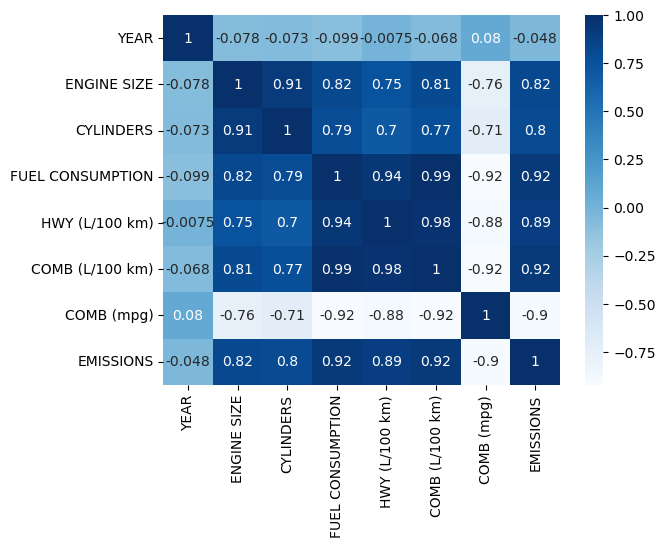

In [8]:
sns.heatmap(data_car.corr(), annot=True, cmap='Blues')

In [9]:
data_car.dtypes

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

In [10]:
data_car['MAKE'].unique()

array(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET',
       'CHRYSLER', 'DAEWOO', 'DODGE', 'FERRARI', 'FORD', 'GMC', 'HONDA',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ',
       'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'SAAB',
       'SATURN', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'BENTLEY', 'ROLLS-ROYCE', 'MASERATI', 'MINI', 'MITSUBISHI',
       'SMART', 'HUMMER', 'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI',
       'SCION', 'FIAT', 'RAM', 'SRT', 'ALFA ROMEO', 'GENESIS', 'Acura',
       'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford',
       'Genesis', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Maserati',
       'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram',
       'Rolls-Royce', 'Sub

In [11]:
x = data_car[['ENGINE SIZE','CYLINDERS','HWY (L/100 km)','COMB (L/100 km)','FUEL CONSUMPTION']].values
x

array([[ 1.6,  4. ,  6.7,  8.1,  9.2],
       [ 1.6,  4. ,  6.5,  7.6,  8.5],
       [ 3.2,  6. ,  7.4, 10. , 12.2],
       ...,
       [ 2. ,  4. ,  8.7,  9.9, 11. ],
       [ 2. ,  4. ,  8.4, 10.1, 11.5],
       [ 2. ,  4. ,  8.9, 10.8, 12.4]])

In [12]:
y = data_car[['EMISSIONS']].values
y

array([[186],
       [175],
       [230],
       ...,
       [232],
       [236],
       [252]], dtype=int64)

<AxesSubplot:xlabel='FUEL CONSUMPTION', ylabel='ENGINE SIZE'>

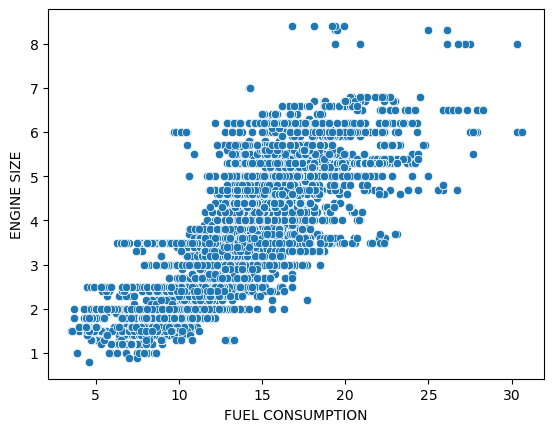

In [13]:
sns.scatterplot(x='FUEL CONSUMPTION', y='ENGINE SIZE', data=data_car)

<AxesSubplot:xlabel='FUEL CONSUMPTION', ylabel='CYLINDERS'>

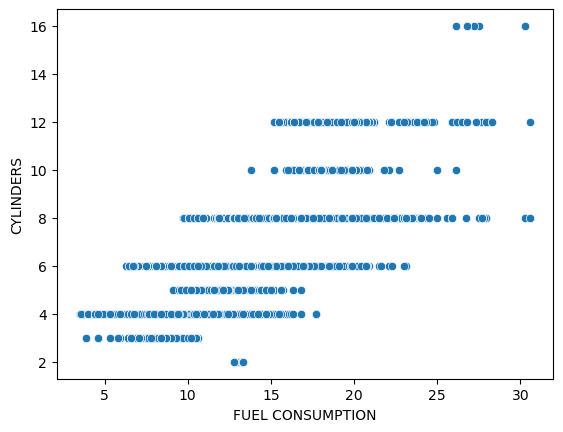

In [14]:
sns.scatterplot(x='FUEL CONSUMPTION', y='CYLINDERS', data=data_car)

<AxesSubplot:xlabel='FUEL CONSUMPTION', ylabel='EMISSIONS'>

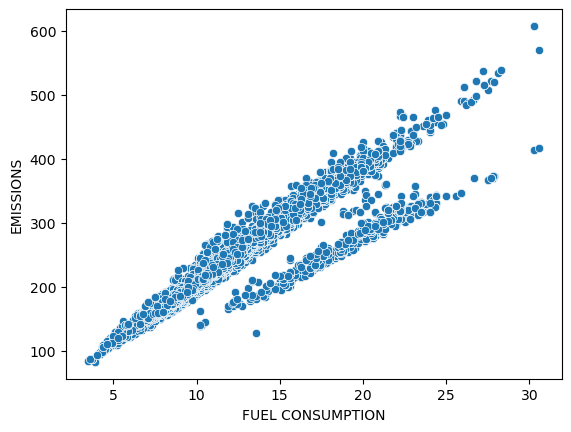

In [15]:
sns.scatterplot(x='FUEL CONSUMPTION', y='EMISSIONS', data=data_car)

AxesSubplot(0.125,0.11;0.775x0.77)


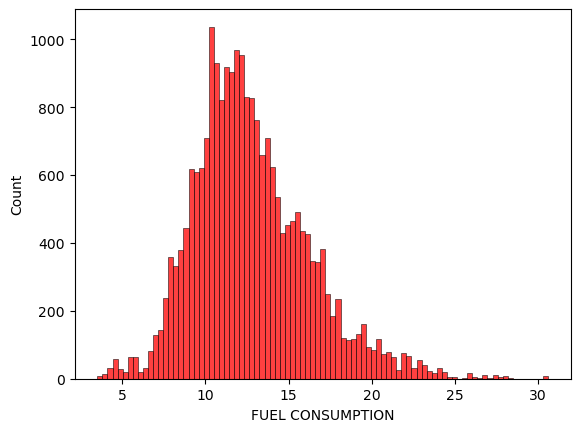

In [41]:
FUEL_CONSUMPTION=sns.histplot(data_car['FUEL CONSUMPTION'],color='red')
print(FUEL_CONSUMPTION)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.28,random_state=0)

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)
y_pred

array([[177.4635876 ],
       [181.4725069 ],
       [188.24579548],
       ...,
       [347.80185129],
       [323.11300516],
       [331.23904211]])

In [42]:
print("**********************Linear Model score*************************")
lin_score=r2_score(y_test,y_pred)
print("Score : ",r2_score(y_test,y_pred))

**********************Linear Model score*************************
Score :  0.866632209801568


In [19]:
import statsmodels.api as sm
model = sm.OLS(lin_reg.predict(x_test),x_test)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.231e+06
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                        0.00
Time:                        00:07:39   Log-Likelihood:                         -22272.
No. Observations:                6316   AIC:                                  4.455e+04
Df Residuals:                    6311   BIC:                                  4.459e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
print('Linear Regression:')
print('Error rates !!!!')
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

Linear Regression:
Error rates !!!!
MSE: 466.08322902803434
MAE: 13.26165753322131


In [21]:
poly_reg = PolynomialFeatures(degree=4)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.transform(x_test)
poly_lr = LinearRegression()
poly_lr.fit(x_poly_train, y_train)
poly_lr_pred = poly_lr.predict(x_poly_test)

In [22]:
import statsmodels.api as sm
model = sm.OLS(poly_lr.predict(poly_reg.fit_transform(x_test)),x_test)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.311e+05
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                        0.00
Time:                        00:07:42   Log-Likelihood:                         -27547.
No. Observations:                6316   AIC:                                  5.510e+04
Df Residuals:                    6311   BIC:                                  5.514e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [43]:
print('Polynomial Regression:')
print('MSE:', mean_squared_error(y_test, poly_lr_pred))
print('MAE:', mean_absolute_error(y_test, poly_lr_pred))
poly_sc = r2_score(y_test, poly_lr_pred)
print('R-squared:', r2_score(y_test, poly_lr_pred))

Polynomial Regression:
MSE: 204.85117027856032
MAE: 6.969520287290521
R-squared: 0.941382684039955


In [24]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

In [25]:
import statsmodels.api as sm
model = sm.OLS(dt.predict(x_test),x_test)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.503e+05
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                        0.00
Time:                        00:07:45   Log-Likelihood:                         -28896.
No. Observations:                6316   AIC:                                  5.780e+04
Df Residuals:                    6311   BIC:                                  5.784e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [44]:
print('Decision Tree Regression:')
print('MSE:', mean_squared_error(y_test, dt_pred))
print('MAE:', mean_absolute_error(y_test, dt_pred))
dec_tre = r2_score(y_test, dt_pred)
print('R-squared:', r2_score(y_test, dt_pred))

Decision Tree Regression:
MSE: 77.82311575054379
MAE: 1.8378272794161012
R-squared: 0.9777312369817484


In [27]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train.ravel())
rf_pred = rf.predict(x_test)

In [28]:
import statsmodels.api as sm
model = sm.OLS(rf.predict(x_test),x_test)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.653e+05
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                        0.00
Time:                        00:07:50   Log-Likelihood:                         -28594.
No. Observations:                6316   AIC:                                  5.720e+04
Df Residuals:                    6311   BIC:                                  5.723e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [45]:
print('Random Forest Regression:')
print('MSE:', mean_squared_error(y_test, rf_pred))
print('MAE:', mean_absolute_error(y_test, rf_pred))
rand = r2_score(y_test, rf_pred)
print('R-squared:', r2_score(y_test, rf_pred))

Random Forest Regression:
MSE: 50.60634083465966
MAE: 2.0919475188756755
R-squared: 0.9855192046681832


In [30]:
svr = SVR(kernel='linear')
svr.fit(x_train, y_train.ravel())
svr_pred = svr.predict(x_test)

In [35]:
import statsmodels.api as sm
model = sm.OLS(svr.predict(x_test),x_test)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.486e+05
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                        0.00
Time:                        00:10:33   Log-Likelihood:                         -27335.
No. Observations:                6316   AIC:                                  5.468e+04
Df Residuals:                    6311   BIC:                                  5.471e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
print('Support Vector Regression:')
print('MSE:', mean_squared_error(y_test, svr_pred))
print('MAE:', mean_absolute_error(y_test, svr_pred))
svm =r2_score(y_test, svr_pred)
print('R-squared:', r2_score(y_test, svr_pred))

Support Vector Regression:
MSE: 402.63113279053533
MAE: 6.898597735988813
R-squared: 0.8847887649651189


In [37]:
svr1 = SVR(kernel='rbf')
svr1.fit(x_train, y_train.ravel())
svr1_pred = svr.predict(x_test)

In [38]:
import statsmodels.api as sm
model = sm.OLS(svr1.predict(x_test),x_test)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.486e+05
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                        0.00
Time:                        00:12:03   Log-Likelihood:                         -27335.
No. Observations:                6316   AIC:                                  5.468e+04
Df Residuals:                    6311   BIC:                                  5.471e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [39]:
print('Support Vector Regression:')
print('MSE:', mean_squared_error(y_test, svr1_pred))
print('MAE:', mean_absolute_error(y_test, svr1_pred))
print('R-squared:', r2_score(y_test, svr1_pred))

Support Vector Regression:
MSE: 402.63113279053533
MAE: 6.898597735988813
R-squared: 0.8847887649651189


In [68]:
data = {'lin_score':0.866632209801568,'poly_sc': 0.941382684039955,'dec_tre':0.9777312369817484,'rand': 0.9855192046681832,'svm':0.8847887649651189}

In [69]:
type_model = list(data.keys())
type_score = list(data.values())

<BarContainer object of 5 artists>

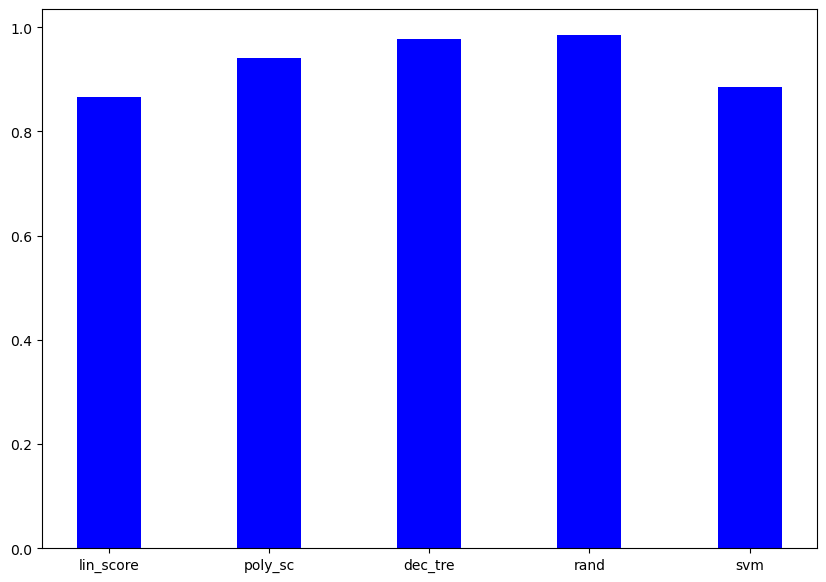

In [71]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))
plt.bar(type_model, type_score, color ='blue', width = 0.4)